In [1]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('paper', font_scale=1.1)
import pandas as pd
import warnings
import sys
import scipy.stats

warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from create_data_byreliability import GetData as gd

In [12]:
DirectoryName = '/Users/seetha/Box Sync/MultiDayData/Data/'
CombinedFolderName = '/Users/seetha/Box Sync/MultiDayData/PlaceCellResultsAll/'
SaveFolder = '/Users/seetha/Box Sync/MultiDayData/NetworkAnalysis/Allcells/'
SaveFigureFolder = '/Users/seetha/Box Sync/MultiDayData/MultiDayPaper/Figures/FigurepanelsPDF/NewNetworkFigs/'

## Task1_Task2

In [4]:
na = gd(DirectoryName, CombinedFolderName)

In [5]:
taskstocompare = 'Task2'
full_graph_rew, by_location_rew, by_animal_rew, numcells = na.get_adjacency_matrix(taskstocompare, basetask='Task1',
                                   reliability_type='All', subsample=False, 
                                   SaveFolder=SaveFolder)

NR34
Analysing..292 cells
CFC17
Analysing..272 cells
NR32
Analysing..183 cells
CFC16
Analysing..476 cells
CFC18
Analysing..499 cells


## Task3_Task4

In [6]:
taskstocompare = 'Task4'
full_graph_norew, by_location_norew, by_animal_norew, temp = na.get_adjacency_matrix(taskstocompare, basetask='Task3',
                                   reliability_type='All', subsample=False,
                                   SaveFolder=SaveFolder)

NR34
Analysing..581 cells
CFC17
Analysing..286 cells
NR32
Analysing..271 cells
CFC16
Analysing..523 cells
CFC18
Analysing..694 cells


## Task2_Task2

In [32]:
taskstocompare = 'Task2'
full_graph_control, by_location_cntrl, by_animal_cntrl, numcells = na.get_adjacency_matrix(taskstocompare, basetask='Task2',
                                   reliability_type='All', subsample=False,
                                   SaveFolder=SaveFolder)

NR34
Analysing..340 cells
CFC17
Analysing..272 cells
NR32
Analysing..240 cells
CFC16
Analysing..480 cells
CFC18
Analysing..563 cells


## Task1_shuffle

In [33]:
taskstocompare = 'Task1'
full_graph_shuffle, by_location_shuffle, by_animal_shuffle, numcells = na.get_adjacency_matrix(taskstocompare, basetask='Task1',
                                   reliability_type='All', subsample=False, shuffle_flag=True,
                                   SaveFolder=SaveFolder)

NR34
Analysing..292 cells
CFC17
Analysing..272 cells
NR32
Analysing..183 cells
CFC16
Analysing..476 cells
CFC18
Analysing..499 cells


## Plot

Norm_Degree
Location 1: t-statistic 9.294, p-values 0.000
Location 2: t-statistic 0.512, p-values 0.609
Location 3: t-statistic 3.480, p-values 0.001
Location 4: t-statistic 3.539, p-values 0.000
Location 5: t-statistic 0.722, p-values 0.471
Clustering
Location 1: t-statistic 16.296, p-values 0.000
Location 2: t-statistic 12.081, p-values 0.000
Location 3: t-statistic 14.799, p-values 0.000
Location 4: t-statistic 16.712, p-values 0.000
Location 5: t-statistic 17.707, p-values 0.000


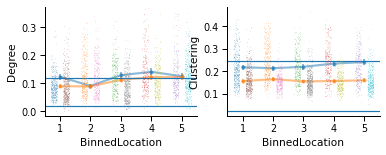

In [31]:
fs, ax = plt.subplots(1, 2)
for n, c in enumerate(['Degree', 'Clustering']):
    na.plot_factors_bylocation_fullgraph(ax[n], full_graph_rew, full_graph_norew, c)
    na.stats_bylocation_fullgraph(full_graph_rew, full_graph_norew, c)
    if n==0:
        controlline = np.mean(by_location_cntrl[c]['mean']/by_location_cntrl[c]['count'])
        shuffleline = np.mean(by_location_shuffle[c]['mean']/by_location_shuffle[c]['count'])
    else:
        controlline = np.mean(by_location_cntrl[c]['mean'])
        shuffleline = np.mean(by_location_shuffle[c]['mean'])
    ax[n].axhline(controlline)
    ax[n].axhline(shuffleline)

sns.despine(fs)
fs.set_size_inches((6, 2))
# fs.savefig(os.path.join(SaveFigureFolder, 'Deg_CC_bylocation_rewvsnorew.pdf'), bbox_inches='tight')

Norm_Degree
Location 1: t-statistic 38.597, p-values 0.000
Location 2: t-statistic 42.459, p-values 0.000
Location 3: t-statistic 34.275, p-values 0.000
Location 4: t-statistic 35.359, p-values 0.000
Location 5: t-statistic 38.667, p-values 0.000
Clustering
Location 1: t-statistic 69.789, p-values 0.000
Location 2: t-statistic 81.005, p-values 0.000
Location 3: t-statistic 76.307, p-values 0.000
Location 4: t-statistic 82.274, p-values 0.000
Location 5: t-statistic 90.534, p-values 0.000


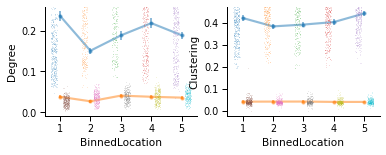

In [36]:
fs, ax = plt.subplots(1, 2)
for n, c in enumerate(['Degree', 'Clustering']):
    na.plot_factors_bylocation_fullgraph(ax[n], full_graph_control, full_graph_shuffle, c)
    na.stats_bylocation_fullgraph(full_graph_control, full_graph_shuffle, c)
sns.despine(fs)
fs.set_size_inches((6, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Deg_CC_bylocation_shuffle.pdf'), bbox_inches='tight')

## Older plots

In [ ]:
fs, ax = plt.subplots(1, 2)

for n, c in enumerate(['Degree', 'Clustering']):
    na.plot_factors_by_animal(ax[n], by_animal_rew, by_animal_norew, column_name=c)
    if n==0:
        controlline = np.mean(by_animal_cntrl[c]['mean']/by_animal_cntrl[c]['count'])
        shuffleline = np.mean(by_animal_shuffle[c]['mean']/by_animal_shuffle[c]['count'])
    else:
        controlline = np.mean(by_animal_cntrl[c]['mean'])
        shuffleline = np.mean(by_animal_shuffle[c]['mean'])
    ax[n].axhline(controlline)
    ax[n].axhline(shuffleline)
    
sns.despine(fs)
fs.set_size_inches((3, 2))
# fs.savefig(os.path.join(SaveFigureFolder, 'Deg_CC_byanimal_rewvsnorew.pdf'), bbox_inches='tight')

In [ ]:
fs, ax = plt.subplots(1, 2)
na.plot_factors_bylocation(ax[0], by_location_cntrl, by_location_shuffle, column_name='Degree')
na.plot_factors_bylocation(ax[1], by_location_cntrl, by_location_shuffle, column_name='Clustering')
sns.despine(fs)
# ax[0].set_ylim((0.07, 0.45))
# ax[1].set_ylim((0.1, 0.4))
fs.set_size_inches((3, 2))
# fs.savefig(os.path.join(SaveFigureFolder, 'Deg_CC_bylocation_shuffle.pdf'), bbox_inches='tight')

In [ ]:
fs, ax = plt.subplots(1, 2)
na.plot_factors_by_animal(ax[0], by_animal_cntrl, by_animal_shuffle, column_name='Degree')
na.plot_factors_by_animal(ax[1], by_animal_cntrl, by_animal_shuffle, column_name='Clustering')
sns.despine(fs)
fs.set_size_inches((3, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Deg_CC_byanimal_shuffle.pdf'), bbox_inches='tight')